# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Import Data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Values

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

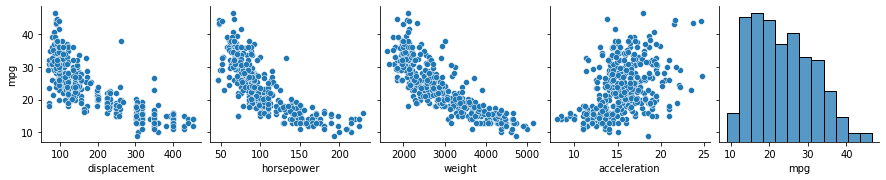

In [13]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

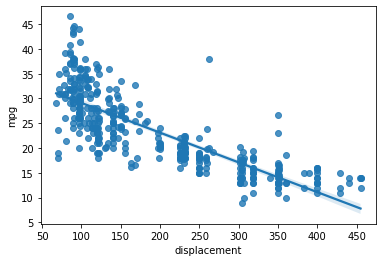

In [14]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# Define Target Variable y and Feature X

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y = df['mpg']

In [17]:
y.shape

(392,)

In [18]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [19]:
x.shape

(392, 4)

# Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [22]:
x = ss.fit_transform(x)

In [23]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Train Test Split Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [26]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [30]:
lr.intercept_

23.372978332051797

In [31]:
lr.coef_

array([-0.26673931, -2.18897318, -4.19579915, -0.18391744])

**Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error**

# Predict Test Data

In [32]:
y_pred = lr.predict(xtest)

In [33]:
y_pred

array([17.12578672, 30.11808273, 13.24251204, 25.40054599, 25.63951381,
       25.98665239, 22.96377682, 23.92340117, 21.01788253, 22.84071344,
       30.81489655, 29.70905133, 16.78411433, 30.95011065, 31.57910912,
       15.13008658, 18.0033992 , 30.47525684, 23.60961605, 28.81881487,
       19.08006755, 13.79335612, 30.2475952 , 16.38598153, 27.45505603,
       26.22128591, 17.26684313, 17.30614112, 16.18095601, 15.84006978,
       21.41358242, 29.68131747, 28.74839432, 24.91908074, 19.41452373,
       21.91268604, 27.3982759 , 26.63916869, 25.93298153, 28.29160424,
       17.21974793, 22.81462446, 27.26461673, 27.94704026,  9.08019212,
       29.84884654, 29.543062  , 30.11078409, 25.96385084, 23.44004756,
       27.24694594, 31.463788  , 25.85144981, 12.83212935, 27.97018008,
       13.01443789, 21.24175892, 27.53096196, 18.68373561, 10.37046263,
       15.11688672, 13.57785023, 29.60392303, 31.21736654, 31.71011558,
       29.21348313, 27.23847668, 23.22367448, 24.51382709, 15.70

# Model Accuracy

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [35]:
mean_absolute_error(ytest, y_pred)

3.288673571240665

In [36]:
mean_absolute_percentage_error(ytest, y_pred)

0.144041599920641

In [37]:
r2_score(ytest, y_pred)

0.7205544454809024

# Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [40]:
x_train2 = poly.fit_transform(xtrain)

In [41]:
x_test2 = poly.fit_transform(xtest)

In [42]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [43]:
lr.intercept_

21.18483674444855

In [44]:
lr.coef_

array([-1.72591647, -5.11048336, -1.87681137, -1.10586877,  0.47610273,
        0.78536356,  0.68429276,  0.78535608, -1.73049848,  1.07277779])

In [45]:
y_pred_poly = lr.predict(x_test2)

# Model Accuracy

In [46]:
mean_absolute_error(ytest, y_pred_poly)

2.96643330838079

In [47]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.1288978049603561

In [48]:
r2_score(ytest, y_pred_poly)

0.7694069840779179